In [103]:
setwd(paste0(Sys.getenv('ROOT'), '/R'))
getwd()

[1] "/mnt/hdd/develop/kaggle/house-prices/R/R"

In [104]:
source('main.R')

data <- kaggle.house$loadData()
df.training <- data$train
df.testing <- data$test
df.combined <- kaggle.house$getCombinedDataset(df.training, df.testing)

c(nrow(df.training),   nrow(df.testing),   nrow(df.combined))
setdiff(df.training %>% colnames, df.testing %>% colnames)

[1] 1460 1459 2919

[1] "SalePrice"

In [123]:
c('Alley', 
  'BsmtCond', 
  'BsmtExposure', 
  'BsmtFinType1', 
  'BsmtFinType2', 
  'BsmtQual',
  'Fence',
  'FireplaceQu',
  'GarageCond',
  'GarageFinish',
  'GarageQual',
  'GarageType',
  'MasVnrType',
  'MiscFeature',
  'PoolQC') -> colums.with.good.na

df.combined %>% select_if(is.character) %>% 
select(-dplyr::one_of(colums.with.good.na)) %>%
purrr::keep(function (col) { sum(is.na(col)) > 0 }) %>%
purrr::map(function (col) { table(col, useNA='always') %>% as.data.frame }) -> tmp

tmp[tmp %>% names %>% sort]

col,Freq
FuseA,188
FuseF,50
FuseP,8
Mix,1
SBrkr,2671
NA,1
col,Freq
AsbShng,44
AsphShn,2
BrkComm,6


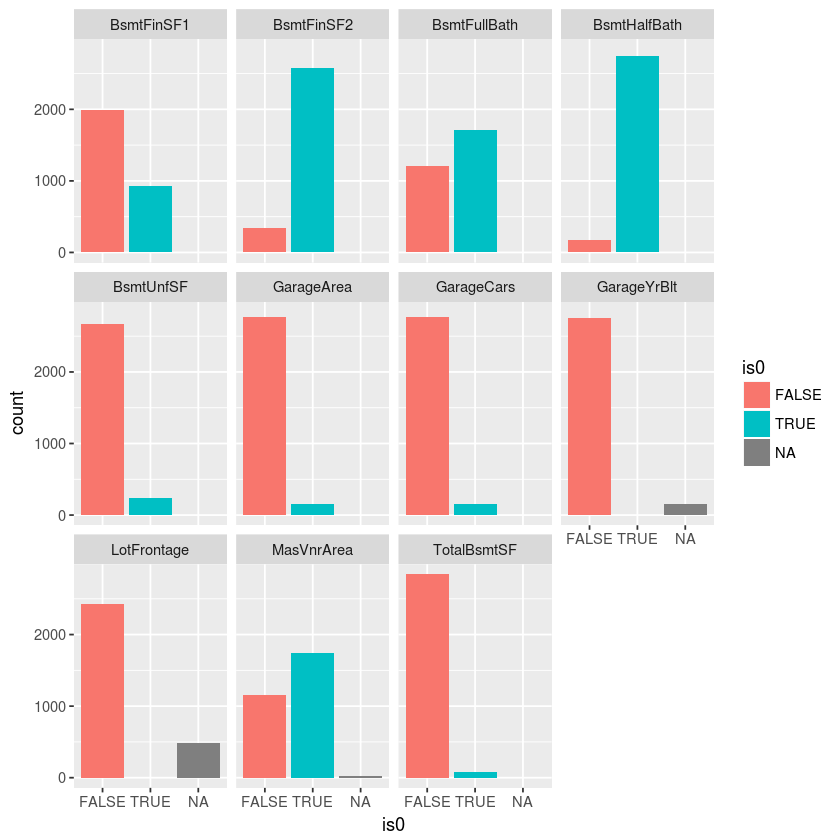

In [154]:
df.combined %>% select(-SalePrice) %>% select_if(is.numeric) %>%
purrr::keep(function (col) { sum(is.na(col)) > 0 }) %>%
select(order(colnames(.))) -> df.combined.numeric.na

df.combined.numeric.na %>% 
gather(attr.name, attr.val) %>%
mutate(is0 = ifelse(attr.val == 0, T, F)) %>%
ggplot() + 
geom_bar(aes(is0, fill=is0)) + 
facet_wrap(~attr.name)

In [50]:
kaggle.house$na$test_na_fixers(df.combined)

df.combined.fixed <- kaggle.house$na$fixAll(df.combined)
df.training.fixed <- df.combined %>% filter(dataSource == "train")
df.testing.fixed <- df.combined %>% filter(dataSource == "test")

[1] "run tests ..."


In [134]:
?gather